In [0]:
import torch
import torchvision
import torchvision.transforms as transforms

In [0]:
# class OHLC(Dataset):
#   def __init__(self, csv_file):
#     self.data = csv_file

#   def _getitem__(self, index):
#     r = self.data.iloc[index]
#     label = torch.tensor(r.is_up_day, dtype = torch.long)
#     sample = self.normalize(torch.tensor([r.open, r.high, r.low, r.close]))
#     return sample, label

#   def __len__(self):
#     return len(self.data)

In [0]:
train_set = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST',
    train = True,
    download = True,
    transform = transforms.Compose([
                                    transforms.ToTensor()
    ])
)

In [0]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=10)

In [46]:
import numpy as np
import matplotlib.pyplot as plt

torch.set_printoptions(linewidth=120)

len(train_set)

60000

In [47]:
train_set.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [48]:
train_set.targets.bincount()

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [49]:
sample = next(iter(train_set))
len(sample)

2

In [0]:
image, label = sample

In [51]:
image.shape

torch.Size([1, 28, 28])

In [52]:
label

9

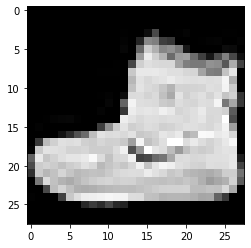

In [53]:
plt.imshow(image.squeeze(), cmap='gray')

In [54]:
batch = next(iter(train_loader))
len(batch[0])

10

In [0]:
images, labels = batch

In [56]:
images.shape

torch.Size([10, 1, 28, 28])

In [57]:
labels.shape

torch.Size([10])

labels :  tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


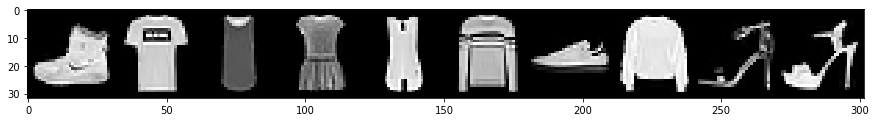

In [58]:
grid = torchvision.utils.make_grid(images, nrow = 10)

plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))

print('labels : ', labels)

In [0]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Network(nn.Module):

  def __init__(self):
    super(Network, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)

    self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
    self.fc2 = nn.Linear(in_features=120, out_features=60)
    self.out = nn.Linear(in_features=60, out_features=10)
    

  def forward(self, t):

    # 1. input layer
    t = t

    # 2. hidden conv layer
    t = self.conv1(t)
    t = F.relu(t) # Activation function for hidden layers, non-linear activation
    t = F.max_pool2d(t, kernel_size = 2, stride = 2)

    # 3. hidden conv layer 2
    t = self.conv2(t)
    t = F.relu(t)
    t = F.max_pool2d(t, kernel_size = 2, stride = 2)
    
    # 4. hidden linear (or dense) layer 1
    t = t.reshape(-1, 12*4*4)
    t = self.fc1(t)
    t = F.relu(t)

    # 5. hidden linear layer 2
    t = self.fc2(t)
    t = F.relu(t)

    # 6. output layer
    t = self.out(t)
    #t = F.softmax(t, dim = 1) # For output of classification problem
    
    return t

In [0]:
def get_num_correct(preds, labels):
  return preds.argmax(dim = 1).eq(labels).sum().item()

In [0]:
network = Network()

In [62]:
network.out.weight.shape

torch.Size([10, 60])

In [63]:
for param in network.parameters():
  print(param.shape)

torch.Size([6, 1, 5, 5])
torch.Size([6])
torch.Size([12, 6, 5, 5])
torch.Size([12])
torch.Size([120, 192])
torch.Size([120])
torch.Size([60, 120])
torch.Size([60])
torch.Size([10, 60])
torch.Size([10])


In [64]:
for name, param in network.named_parameters():
  print(name, '\t - ', param.shape)

conv1.weight 	 -  torch.Size([6, 1, 5, 5])
conv1.bias 	 -  torch.Size([6])
conv2.weight 	 -  torch.Size([12, 6, 5, 5])
conv2.bias 	 -  torch.Size([12])
fc1.weight 	 -  torch.Size([120, 192])
fc1.bias 	 -  torch.Size([120])
fc2.weight 	 -  torch.Size([60, 120])
fc2.bias 	 -  torch.Size([60])
out.weight 	 -  torch.Size([10, 60])
out.bias 	 -  torch.Size([10])


## Single image batch forward pass to network

In [65]:
# creating a batch of single image
sample = next(iter(train_set))
image, label = sample
# unsqueeze adds a dimension
image.unsqueeze(0).shape

pred = network(image.unsqueeze(0))
pred.argmax(dim=1)

tensor([8])

In [66]:
F.softmax(pred, dim = 1)

tensor([[0.0897, 0.1062, 0.1077, 0.0997, 0.1090, 0.1011, 0.0886, 0.0912, 0.1138, 0.0932]], grad_fn=<SoftmaxBackward>)

In [67]:
label

9

## Dataloader + Batch Size Datasets

In [0]:
data_loader = torch.utils.data.DataLoader(
    train_set,
    batch_size = 10
)

batch = next(iter(data_loader))

images, labels = batch

In [69]:
preds = network(images)
F.softmax(preds, dim = 1)

tensor([[0.0897, 0.1062, 0.1077, 0.0997, 0.1090, 0.1011, 0.0886, 0.0912, 0.1138, 0.0932],
        [0.0900, 0.1065, 0.1073, 0.0999, 0.1082, 0.1011, 0.0895, 0.0908, 0.1138, 0.0928],
        [0.0898, 0.1054, 0.1084, 0.1002, 0.1089, 0.1007, 0.0892, 0.0910, 0.1132, 0.0932],
        [0.0896, 0.1061, 0.1081, 0.1002, 0.1085, 0.1009, 0.0892, 0.0909, 0.1136, 0.0929],
        [0.0897, 0.1056, 0.1077, 0.0999, 0.1083, 0.1015, 0.0897, 0.0914, 0.1132, 0.0928],
        [0.0899, 0.1067, 0.1071, 0.1002, 0.1085, 0.1014, 0.0896, 0.0905, 0.1140, 0.0920],
        [0.0893, 0.1049, 0.1081, 0.1006, 0.1093, 0.1017, 0.0887, 0.0912, 0.1135, 0.0926],
        [0.0903, 0.1076, 0.1065, 0.1004, 0.1080, 0.1019, 0.0899, 0.0898, 0.1139, 0.0917],
        [0.0896, 0.1058, 0.1088, 0.1007, 0.1089, 0.0997, 0.0895, 0.0912, 0.1133, 0.0926],
        [0.0896, 0.1052, 0.1089, 0.1000, 0.1079, 0.1005, 0.0902, 0.0917, 0.1136, 0.0924]], grad_fn=<SoftmaxBackward>)

In [70]:
preds.argmax(dim = 1)

tensor([8, 8, 8, 8, 8, 8, 8, 8, 8, 8])

In [71]:
labels

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])

In [72]:
preds.argmax(dim=1).eq(labels).sum()
# torch.tensor([9,0,1,3,0,2,7,2,4,3], dtype=torch.int32).eq(labels).sum()

tensor(0)

In [73]:
preds

tensor([[-0.1015,  0.0665,  0.0804,  0.0033,  0.0926,  0.0173, -0.1142, -0.0857,  0.1357, -0.0641],
        [-0.0992,  0.0697,  0.0773,  0.0053,  0.0858,  0.0175, -0.1040, -0.0900,  0.1358, -0.0676],
        [-0.1012,  0.0593,  0.0873,  0.0087,  0.0913,  0.0138, -0.1079, -0.0878,  0.1304, -0.0638],
        [-0.1028,  0.0660,  0.0850,  0.0097,  0.0887,  0.0160, -0.1072, -0.0881,  0.1350, -0.0663],
        [-0.1033,  0.0602,  0.0802,  0.0046,  0.0854,  0.0206, -0.1026, -0.0840,  0.1297, -0.0690],
        [-0.0998,  0.0723,  0.0761,  0.0093,  0.0884,  0.0210, -0.1025, -0.0924,  0.1379, -0.0760],
        [-0.1054,  0.0564,  0.0859,  0.0138,  0.0974,  0.0250, -0.1118, -0.0836,  0.1350, -0.0683],
        [-0.0941,  0.0815,  0.0714,  0.0127,  0.0857,  0.0271, -0.0982, -0.0987,  0.1382, -0.0785],
        [-0.1022,  0.0639,  0.0917,  0.0143,  0.0933,  0.0042, -0.1030, -0.0846,  0.1324, -0.0691],
        [-0.1037,  0.0566,  0.0908,  0.0056,  0.0821,  0.0105, -0.0980, -0.0814,  0.1327, -0.0730]],

## Loss Function

In [74]:
preds = network(images)
loss = F.cross_entropy(preds, labels)
loss

tensor(2.3375, grad_fn=<NllLossBackward>)

## Calculating the Gradient

In [75]:
print(network.conv1.weight.grad)

None


In [0]:
loss.backward()

## Update the weights

In [0]:
optimizer = optim.Adam(network.parameters(), lr = 0.01) # lr : learning rate, a hyperparameter i.e. manually set and randomize

In [78]:
loss

tensor(2.3375, grad_fn=<NllLossBackward>)

In [79]:
get_num_correct(preds, labels)

0

In [0]:
optimizer.step() # Update the weights

In [0]:
# New batch of 100 images
data_loader = torch.utils.data.DataLoader(
    train_set,
    batch_size = 100
)

batch = next(iter(data_loader))

images, labels = batch


preds = network(images)
loss = F.cross_entropy(preds, labels)

In [82]:
loss.item()

2.3115172386169434

In [83]:
get_num_correct(preds, labels)

9

# New network + Training in batches, epochs

In [84]:
network = Network()

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr=0.01)

for epoch in range(5):

  total_loss = 0
  total_correct = 0

  for batch in train_loader: 
    images, labels = batch

    preds = network(images)
    loss = F.cross_entropy(preds, labels)

    optimizer.zero_grad() # zero the gradients, 
    loss.backward() # Calculate gradient
    optimizer.step() # Update the weights

    total_loss += loss.item()
    total_correct += get_num_correct(preds, labels)

  print('epoch : ', epoch, 'total_correct : ', total_correct, 'loss : ', total_loss)
  print('Accuracy : ', total_correct / len(train_set))

epoch :  0 total_correct :  46411 loss :  356.43276086449623
Accuracy :  0.7735166666666666
epoch :  1 total_correct :  50732 loss :  249.9372593909502
Accuracy :  0.8455333333333334
epoch :  2 total_correct :  51292 loss :  233.3340830206871
Accuracy :  0.8548666666666667
epoch :  3 total_correct :  51702 loss :  223.12693324685097
Accuracy :  0.8617
epoch :  4 total_correct :  51977 loss :  214.82850970327854
Accuracy :  0.8662833333333333


In [85]:
total_correct / len(train_set)

0.8662833333333333

## Confusion Matrix

In [86]:
len(train_set)

60000

In [90]:
train_set.targets[0].item()

9

In [0]:
def get_all_preds(model, loader):
  all_preds = torch.tensor([])
  for batch in loader:
    images, labels = batch

    preds = model(images)
    all_preds = torch.cat(
        (all_preds, preds),
        dim = 0
    )

  return all_preds

In [0]:
prediction_loader = torch.utils.data.DataLoader(train_set, batch_size = 10000)
train_preds = get_all_preds(network, prediction_loader)

In [93]:
train_preds.shape

torch.Size([60000, 10])

In [94]:
print(train_preds.requires_grad)

True


In [95]:
train_preds.grad_fn

In [0]:
# Remove overhead of creating/tracking gradient graph
with torch.no_grad():
  prediction_loader = torch.utils.data.DataLoader(train_set, batch_size=10000)
  train_preds = get_all_preds(network, prediction_loader)

In [97]:
print(train_preds.requires_grad)

False


In [0]:
train_preds.grad_fn

In [101]:
preds_correct = get_num_correct(train_preds, train_set.targets)

print('Total correct : ', preds_correct)
print('Accuracy : ', preds_correct/len(train_set))

Total correct :  51344
Accuracy :  0.8557333333333333


In [102]:
train_set.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [103]:
train_preds.argmax(dim=1)

tensor([9, 0, 0,  ..., 3, 0, 5])

In [0]:
stacked = torch.stack(
    (
      train_set.targets,
      train_preds.argmax(dim=1)
    ),
    dim = 1
)

In [112]:
stacked.shape

torch.Size([60000, 2])

In [113]:
stacked

tensor([[9, 9],
        [0, 0],
        [0, 0],
        ...,
        [3, 3],
        [0, 0],
        [5, 5]])

In [116]:
conf_matrix = torch.zeros(10, 10, dtype = torch.int32)
conf_matrix

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=torch.int32)

In [0]:
for p in stacked:
  j,k = p.tolist() # j = true label, k = predicted label
  conf_matrix[j,k] = conf_matrix[j,k] + 1

In [118]:
conf_matrix

tensor([[5523,   59,   58,  215,   13,    9,   96,    0,   27,    0],
        [  13, 5904,    5,   62,    3,    7,    3,    0,    2,    1],
        [ 133,   13, 4249,  105, 1133,    7,  347,    0,   13,    0],
        [ 258,  339,   17, 5294,   40,    3,   41,    0,    7,    1],
        [  25,   58,  239,  621, 4670,    1,  366,    0,   20,    0],
        [   1,    0,    1,    1,    0, 5853,    0,   72,   19,   53],
        [1837,   56,  529,  203,  575,    5, 2752,    0,   43,    0],
        [   0,    0,    0,    0,    0,  197,    0, 5634,   25,  144],
        [  37,    5,   46,   23,   27,   24,   66,    3, 5763,    6],
        [   0,    3,    0,    3,    0,   71,    2,  212,    7, 5702]], dtype=torch.int32)

## Plotting the Confusion Matrix

In [0]:
from sklearn.metrics import confusion_matrix

In [121]:
cm = confusion_matrix(train_set.targets, train_preds.argmax(dim=1))
print(cm)

[[5523   59   58  215   13    9   96    0   27    0]
 [  13 5904    5   62    3    7    3    0    2    1]
 [ 133   13 4249  105 1133    7  347    0   13    0]
 [ 258  339   17 5294   40    3   41    0    7    1]
 [  25   58  239  621 4670    1  366    0   20    0]
 [   1    0    1    1    0 5853    0   72   19   53]
 [1837   56  529  203  575    5 2752    0   43    0]
 [   0    0    0    0    0  197    0 5634   25  144]
 [  37    5   46   23   27   24   66    3 5763    6]
 [   0    3    0    3    0   71    2  212    7 5702]]


In [0]:
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

Confusion matrix, without normalization
tensor([[5523,   59,   58,  215,   13,    9,   96,    0,   27,    0],
        [  13, 5904,    5,   62,    3,    7,    3,    0,    2,    1],
        [ 133,   13, 4249,  105, 1133,    7,  347,    0,   13,    0],
        [ 258,  339,   17, 5294,   40,    3,   41,    0,    7,    1],
        [  25,   58,  239,  621, 4670,    1,  366,    0,   20,    0],
        [   1,    0,    1,    1,    0, 5853,    0,   72,   19,   53],
        [1837,   56,  529,  203,  575,    5, 2752,    0,   43,    0],
        [   0,    0,    0,    0,    0,  197,    0, 5634,   25,  144],
        [  37,    5,   46,   23,   27,   24,   66,    3, 5763,    6],
        [   0,    3,    0,    3,    0,   71,    2,  212,    7, 5702]], dtype=torch.int32)


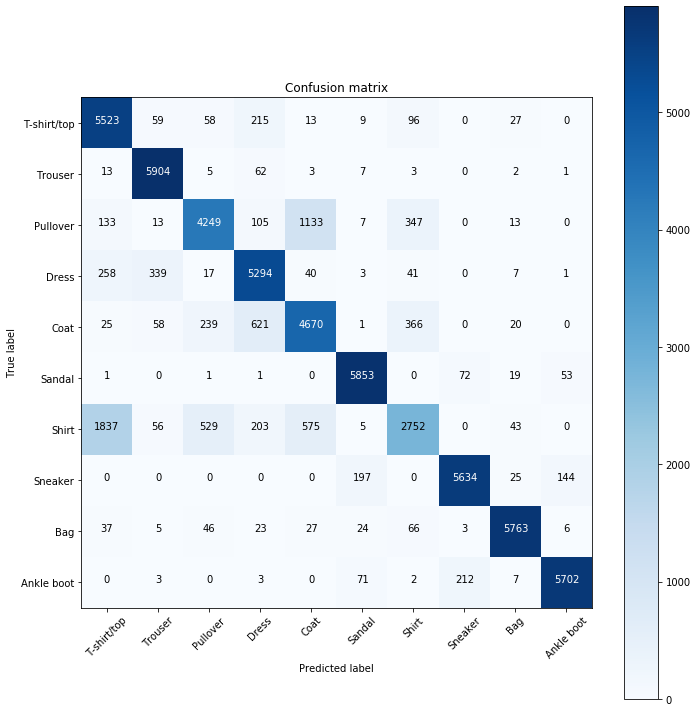

In [131]:
names = (
    'T-shirt/top'
    ,'Trouser'
    ,'Pullover'
    ,'Dress'
    ,'Coat'
    ,'Sandal'
    ,'Shirt'
    ,'Sneaker'
    ,'Bag'
    ,'Ankle boot'
)
plt.figure(figsize=(10,10))
plot_confusion_matrix(conf_matrix, names)